<h1>1. Setup and Load Data</h1

<h2>1.1. Setup</h2>

In [77]:
# Importing TensorFlow library 
import tensorflow as tf
# Importing the os module for operating system-related functionalities
import os

<h2>1.2. Remove Dodgy Images</h2>

In [78]:
# Importing OpenCV library for computer vision tasks
import cv2
# Importing imghdr for determining the image file type
import imghdr

In [79]:
# Directory path for the dataset 
data_dir='/kaggle/input/bioandnonbiodata/data'

In [80]:
# Listing the contents of the directory specified by 'data_dir'
os.listdir(data_dir)

# N- Nonbiodedgradable
# B- Biodegradable

['N', 'B']

In [81]:
image_exts=['jpeg','jpg','bmp','png']

In [82]:
# Looping through each image classes
for image_class in os.listdir(data_dir):
    # Looping through Images in Each Class:
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Constructing the full path to the current image
        image_path = os.path.join(data_dir, image_class, image)
    
        # Attempting to read the image using OpenCV and determining its file type
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            # Checking if the image file type is not in the allowed list
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                # Removing the image file
                os.remove(image_path)
        
        # Handling exceptions (e.g., issues with image reading)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B_0056.jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B_0056.jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B_0276.jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B_0276.jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B_0075.jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B_0075.jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B_ (865).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B_ (865).jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B_0076.jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B_0076.jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B_0064.jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B_0064.jpg
Image not in ext list /kaggle/input/bioandnonbiodata/data/B/B (79).jpg
Issue with image /kaggle/input/bioandnonbiodata/data/B/B (79).jpg
Image not in ext list /kaggle/input/b

<h2>1.3 Load Data<h2>

In [83]:
# Importing NumPy for numerical operations and Matplotlib for data visualization
import numpy as np
from matplotlib import pyplot as plt

In [84]:
# Creating a TensorFlow image dataset from a directory
data=tf.keras.utils.image_dataset_from_directory('/kaggle/input/bioandnonbiodata/data')

Found 6855 files belonging to 2 classes.


In [85]:
# Converting the TensorFlow dataset to a NumPy iterator for compatibility, custom processing, and easy visualization
data_iterator=data.as_numpy_iterator()

In [86]:
# Obtaining the next batch of data from the NumPy iterator
batch=data_iterator.next()

In [87]:
#Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [88]:
# class1= non bio degradable
# class0 = biodegradable
batch[1]

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

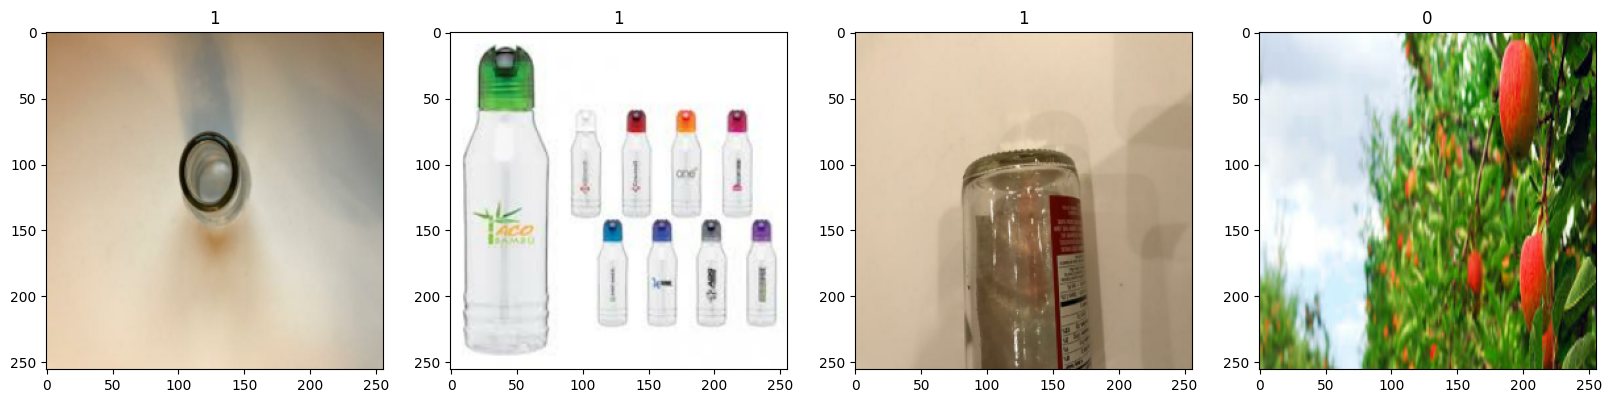

In [89]:
# Displaying the first 4 images from the current batch along with their corresponding labels
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
# Looping through the images in the batch
for idx,img in enumerate(batch[0][:4]):
    # Displaying each image as a subplot
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>2. Preprocess Data</h1

<h2>2.1. Scale Data</h2>

In [90]:
# Scaling pixel values in the image batch to the range [0, 1]
scaled=batch[0]/255

In [91]:
scaled.max()

1.0

In [92]:
# Scaling pixel values in the entire dataset using TensorFlow's map function
scaled_data=data.map(lambda x,y:(x/255,y))

In [93]:
# Creating a NumPy iterator from the scaled TensorFlow dataset
scaled_iterator=scaled_data.as_numpy_iterator()

In [94]:
batch=scaled_iterator.next()

In [95]:
batch[0].max()

1.0

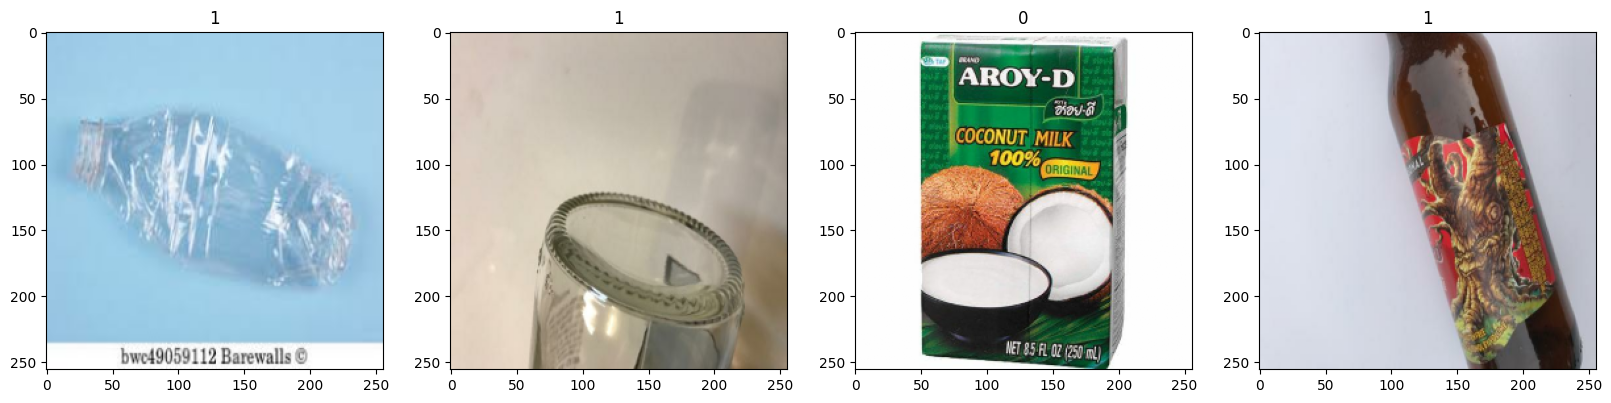

In [96]:
# Displaying the first 4 images from the current batch along with their corresponding labels
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
# Looping through the images in the batch
for idx,img in enumerate(batch[0][:4]):
    # Displaying each image as a subplot
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

<h2>2.2 Split Data</h2>

In [97]:
dataset_length=len(scaled_data)

In [98]:
# Calculating sizes for training, validation, and test sets based on the scaled dataset
train_size=int(dataset_length*.7) #150
val_size=int(dataset_length*.2)+1 #44
test_size=int(dataset_length*.1)  #21

In [99]:
train_size+val_size+test_size

215

In [100]:
# Creating training, validation, and test sets from the scaled dataset
train=scaled_data.take(train_size)
val=scaled_data.skip(train_size).take(val_size)
test=scaled_data.skip(train_size+val_size).take(test_size)

<h1>3. Build Model</h1>

In [101]:
# Importing necessary modules from TensorFlow Keras for building a convolutional neural network (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout


In [102]:
# Initializing a Sequential model for building a neural network layer by layer
model=Sequential()

In [103]:
# # Constructing a Convolutional Neural Network (CNN) for image classification:
# - Convolutional layers extract features
# - MaxPooling layers downsample and retain important information
# - Flattening prepares data for Dense layers
# - Dense layers perform classification tasks (ReLU for internal layers, sigmoid for binary output)

#Adding Convolutional and Pooling layers to the Sequential model
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

# Flattening the output and adding Dense layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [104]:
# Compiling the model using the Adam optimizer, Binary Crossentropy loss, and tracking accuracy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [105]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])# Yo k garne ho tha vayena , yei ho hyperparamter tuning vaneko?

In [106]:
# Displaying a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

<h2>3.2. Train</h2>

In [107]:
# Setting the directory path for storing logs during training
logdir='/kaggle/working/logs'

In [108]:
# Creating a TensorBoard callback for logging during model training
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [109]:
# Training the model for 20 epochs on the training set, validating on the validation set, and using TensorBoard for logging
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
150/150 [==============================] - 32s 198ms/step - loss: 0.5676 - accuracy: 0.7173 - val_loss: 0.5178 - val_accuracy: 0.7408
Epoch 2/20
150/150 [==============================] - 30s 196ms/step - loss: 0.4642 - accuracy: 0.7833 - val_loss: 0.5180 - val_accuracy: 0.7521
Epoch 3/20
150/150 [==============================] - 20s 134ms/step - loss: 0.4288 - accuracy: 0.7960 - val_loss: 0.4735 - val_accuracy: 0.7756
Epoch 4/20
150/150 [==============================] - 20s 131ms/step - loss: 0.3877 - accuracy: 0.8163 - val_loss: 0.4662 - val_accuracy: 0.7784
Epoch 5/20
150/150 [==============================] - 30s 200ms/step - loss: 0.3205 - accuracy: 0.8550 - val_loss: 0.4767 - val_accuracy: 0.7912
Epoch 6/20
150/150 [==============================] - 30s 200ms/step - loss: 0.2646 - accuracy: 0.8840 - val_loss: 0.4758 - val_accuracy: 0.8061
Epoch 7/20
150/150 [==============================] - 19s 128ms/step - loss: 0.2136 - accuracy: 0.9071 - val_loss: 0.5264 - val_ac

In [110]:
# Accessing the training history containing metrics over epochs
hist.history

{'loss': [0.5675817131996155,
  0.4641515016555786,
  0.42878469824790955,
  0.3877066373825073,
  0.3204943835735321,
  0.2646225392818451,
  0.21356338262557983,
  0.1881072074174881,
  0.12654292583465576,
  0.125121608376503,
  0.14164355397224426,
  0.0975809097290039,
  0.09384442865848541,
  0.06305187940597534,
  0.04224056750535965,
  0.03982599079608917,
  0.06471119821071625,
  0.056072160601615906,
  0.026703214272856712,
  0.03313809260725975],
 'accuracy': [0.7172916531562805,
  0.7833333611488342,
  0.7960416674613953,
  0.8162500262260437,
  0.8550000190734863,
  0.8839583396911621,
  0.9070833325386047,
  0.9254166483879089,
  0.9539583325386047,
  0.9508333206176758,
  0.9493749737739563,
  0.9639583230018616,
  0.9670833349227905,
  0.9775000214576721,
  0.9866666793823242,
  0.9852083325386047,
  0.9800000190734863,
  0.9820833206176758,
  0.9906250238418579,
  0.9889583587646484],
 'val_loss': [0.5177517533302307,
  0.5179994106292725,
  0.4734681248664856,
  0.466

<h2>3.3 Plot Performance</h2>

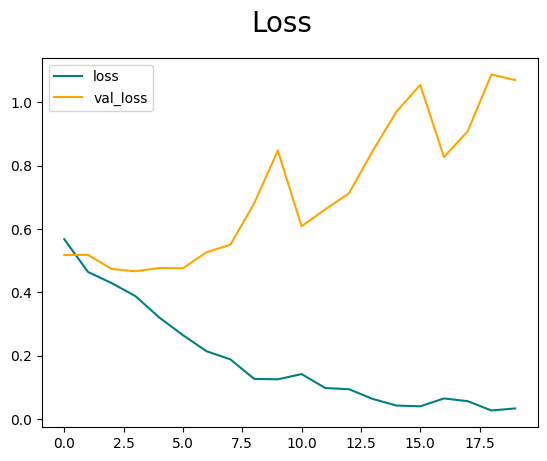

In [111]:
# Plotting training and validation loss over epochs
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

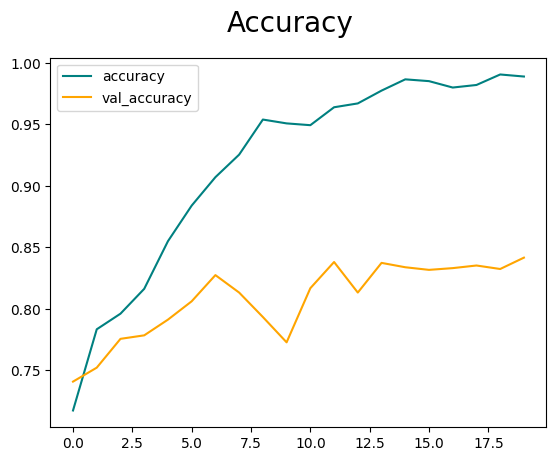

In [112]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h1>4. Evaluate Performance</h1>

In [113]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [114]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [115]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 239ms/step


In [116]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.8217270374298096,Recall:0.8380681872367859,Accuracy:0.812982976436615


<h1>5. Test</h1>

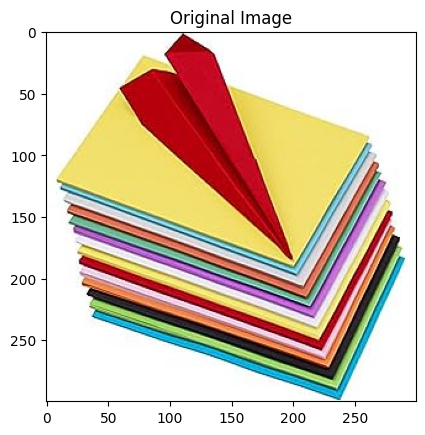

1/1 [==============================] - 0s 22ms/step
Prediction: BioDegradable


In [120]:
import cv2

def predict_class(image_path, model):
    # Read the image
    img = cv2.imread(image_path)
    
    # Print the original image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.show()

    # Resize the image to match the input size of the model
    resized_img = tf.image.resize(img, (256, 256))

    # Expand dimensions to create a batch of size 1
    input_image = np.expand_dims(resized_img / 255, 0)

    # Use the trained model to make a prediction
    prediction = model.predict(input_image)

    # Check the prediction and print the result
    if prediction > 0.5:
        print("Prediction: NonBiodegradable")
    else:
        print("Prediction: BioDegradable")

# Example usage:
image_path = '/kaggle/input/datasetttt/B (2).jpg'
result = predict_class(image_path, model)

<h1>Save the Model</h1>

In [118]:
from tensorflow.keras.models import load_model

In [119]:
model.save('my_model.keras')

<h1></h1>